# 미래를 예측하는 데이터 분석

예측 분석이란 데이터를 분석하여 특정 결과를 미리 예측해보는 것이다.

- 지도 학습과 비지도 학습의 개념을 이해한다.
- 회귀 분석으로 예측을 수행한다.
- 시계열 데이터의 트렌드를 예측한다.
- 수학적 기법을 활용하여 평점을 예측한다.

## 프로야구 선서의 다음 해 연봉 예측하기

예측 분석의 가장 대표적인 방법인 회귀 분석을 살펴보자.우리가 나이, 몸무게, 키를 1번부터 4번까지의 사람을 알고 있다고 가정하자. 여기에서
4번 사람은 나이와 몸무게는 알고있는 값이지만, 키는 모른다고 가정해보자. 이렇게 되면 1~3번의 사람의 데이터는 **학습 전용 데이터셋** 그리고 4번 사람의 데이터는 **테스트 전용 데이터셋** 이라고 한다. 그리고 이러한 학습 방식을 **지도 학습**이라고 한다. 지도 학습의 과정은 수험생의 공부 과정에 비유할 수 있다. 수험생은 모의고사를 정답과 함께 공부한 뒤, 이를 평가하는 실제 수능을 보기 때문이다.

### Step1. 프로야구 연봉 데이터 살펴보기

우선 데이터셋의 기본 정보를 살펴보자. 데이터의 기초 탐색결과는 다음과 같다. 프로야구 연봉 데이터셋은 총 152개이며, 22개 피처로 구성되어 있다. 이 22개의 피처는 선수가 가지고 있는 기록(승,패, 홈런 등의 수치)들에 대한 세부 정보를 나타낸다.

In [18]:
# 프로야구 연봉 데이터셋의 기본 정보 구하기

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Source : https://www.statiz.co.kr/

picher_file_path = './data/picher_stats_2017.csv'
batter_file_path = './data/batter_stats_2017.csv'

picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [37]:
# 한글폰트

import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    re('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')
        
%matplotlib inline

Unknown system... sorry~~~~


컬럼 확인

In [32]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [33]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [90]:
picher.tail()

,선수명,연봉(2017)
147,장민재,8100
148,정용운,3100
149,노경은,16000
150,김승현,2900
151,류희운,3000


In [34]:
print(picher.shape)

(152, 22)


**우리가 예측할 회귀 분석의 목표 y 값은 데이터 '연봉(2018)'피처이다** 다음 코드는 이를 히스토그램과 상자 그림 box plot으로 시각화 한 것이다.

In [35]:
# 예측할 대상인 '연봉'에 대한 정보
picher['연봉(2018)'].describe

<bound method NDFrame.describe of 0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64>

<AxesSubplot:>

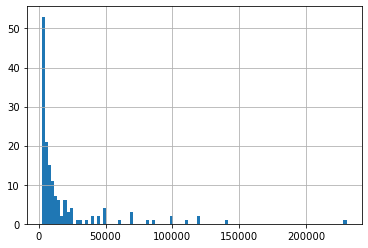

In [42]:
# 2018년 연봉 분포를 출력한다.

picher['연봉(2018)'].hist(bins=100)

<AxesSubplot:>

/home/goldang/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/goldang/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/goldang/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/goldang/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0, flags=flags)


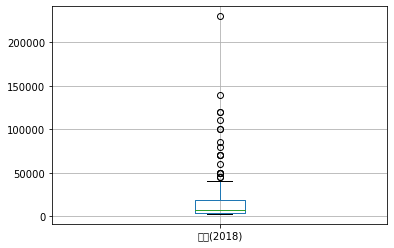

In [41]:
# 연봉의 상자 그림을 출력한다.

picher.boxplot(column=['연봉(2018)']) 

히스토그램에서는 연봉의 분포를 파악할 수 있으며, 상자 그림에서는 연봉의 일반적인 범주를 파악 할 수 있다. 흔히 말하는 '수입억대 연봉'을 받는 프로 선수는 많지 않으며, 5억 원 미만의 연봉이 일반적으로 보인다.

다음으로 각각의 피처들은 어떤 특징을 가지고 있는지 살펴본다. 아래의 실행 결과는 '선수명'이나 '팀명'과 같이 그래프로 표현할 수 없는 피처들을 제외한 뒤, 모든 수치형 피처의 분포를 시각화한 것이다. 이를 통해 몇몇 피처들은 매우 불균형한 분포를 가지고 있다는 것을 알 수 있다.

- 회귀 분석에 사용할 피처 살펴보기

In [57]:
# 피처 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [18, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

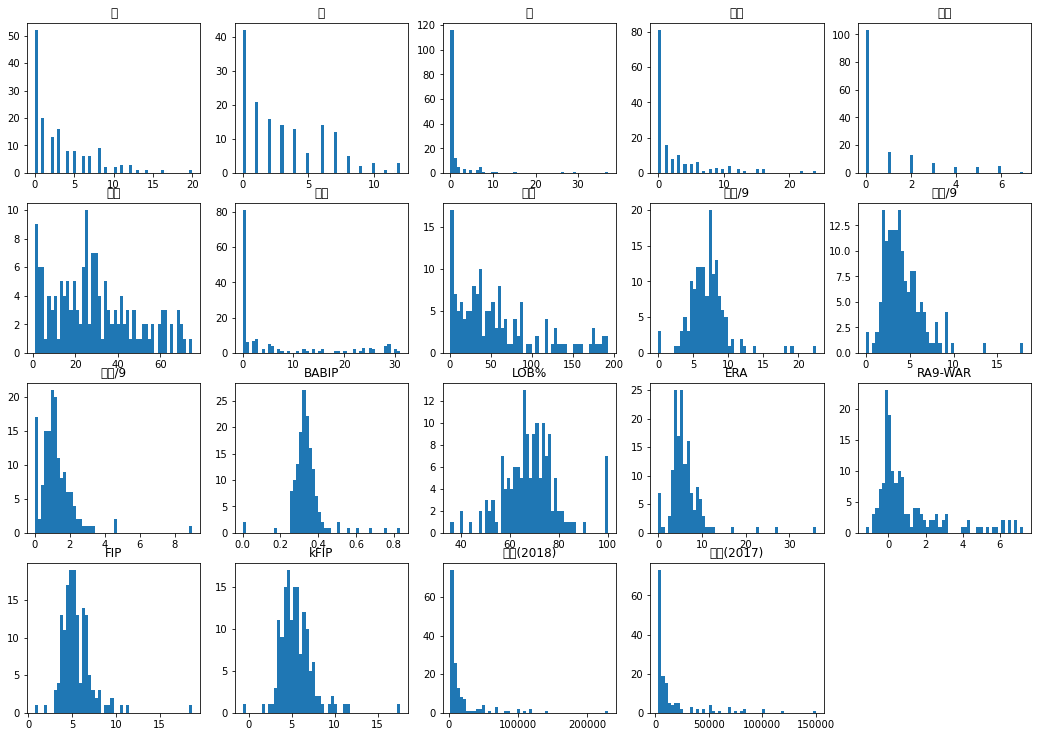

In [58]:
plot_hist_each_column(picher_features_df)

또 한 가지 그래프를 통해 알 수 있는 것은 각 피처 간의 단위가 다르다는 것이다. 예를 들어 '홈런/9'라는 피처는 x축이 0~8 사이의 값인 반면,
'이닝'이라는 피처는 0~200 사이의 값을 포함하고 있다. 이러한 데이터는 피처의 정규화 혹은 스케일링 되어있지 않은 데이터 이다.

#### Step2 예측: 투수의 연봉 예측하기

스케일링의 방법 중 표준화 방법을 적용하였다. 표준화는 정규분포에서의 z- 값을 구하는 과정과 동일하다.

- 피처들의 단위 맞춰주기: 피처 스케일링

In [60]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해준다.
pd.options.mode.chained_assignment = None

In [61]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의한다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [62]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

In [63]:
picher_df = picher_df.rename(columns={'연봉(2018)': 'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


연속형이 아닌 범주형 피처들은 어떻게 정규화 할 수 있을까? 범주형 피처에는 **원-핫 인코딩**이라는 방법을 적용해야 한다. 판다스에서는 fet_dummies()라는 함수로 간단하게 원-핫 인코딩을 적용할 수 있다. 다음 실행 결과는 원-핫 인코딩의 적용 결과이다.

- 피처들의 단위 맞춰주기: 원-핫 인코딩

In [64]:
# 팀명 피처를 원-핫 인코딩으로 변환한다.

team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis = 1)
picher_df = picher_df.join(team_encoding)
team_encoding.head()

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


이제 회귀 분석 모델을 학습시킬 준비가 거의 완료 되었다. 한 가지 더 준비할 것은 모델의 학습 데이터셋과 모델의 테스트 데이터셋으로 데이터를 분리하는 것이다. 파이썬에서는 sklearn 이라는 모듈의 train_test_split() 함수로 이를 수행할 수 있다. 다음 코드의 실행 결과 8:2의 비율로 총 4개의 데이터가 생성된다. X_train과 Y_train은 학습데이터셋, 그리고 X_test와 y_test는 테스트 데이터셋을 의미 한다.

In [65]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리하기

X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=19)

이제 회귀 분석을 수행하는 코드를 살펴보자. 다음 코드에서는 sklearn 라이브러리의 LinearRegression()으로 모델 오브젝트를 선언한 뒤, 해당 오브젝트에 model = lr.fit(X_train, y_train) 코드를 실행시킨다. 그러면 아래의 결과처럼 학습이 완료된 회귀식의 계수를 출력할 수 있다.

In [66]:
# 회귀 분석 계수를 학습한다. (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 학습된 계수를 출력한다.
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


#### Step3 평가: 예측 모델 평가하기

회귀 분석은 statsmodel 라이브러리의 OLS 클래스로도 실행이 가능하다. OLS 클래스의 summary() 함수를 사용하면 다음의 실행 결과처럼 계수에 대한 자세한 분석 내용을 살펴볼 수 있다.

- 어떤 피처가 가장 영향력이 강한 피처일까?

In [68]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행한다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           7.70e-42
Time:                        18:54:56   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.78e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

위 실행 결과에서는 결정 계수 혹은 수정 결정 계수라는 점수를 눈여겨볼 필요가 있다. 이 점수들은 회귀 분석이 얼마나 잘 되었는지 평가하는 지표이며, 회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가?에 대한 점수이다. 이 점수들이 1에 가까울수록 데이터를 잘 설명하는 모델이라고 할 수 있다.

다음으로 F 통계량 이라는 수치를 살펴본다. F 통계량은 회귀식의 유의성 검정에 사용되는 값으로 F통계량에 대한 p-value 수치와 함께 살펴봐야 한다. 일반적으로 p-value가 0.05 이하면 F 통계량이 유의한 의미를 가진다 라는 결론을 내려도 무방하며 이는 회귀 분석이 유의미한 결과를 가진다는 것이다.

또한 표의 P > t 라는 정보는 각 피처의 검정 통계량(t-statics)이 얼마나 유의미한지에 대한 p-value를 나타낸 것이다. 'WAR',연봉2017,'한화' 3개의 피처의 P-VALUE가 0.05 미만으로 나타났기 때문에 회귀 분석에서 유의미한 피처들이라는 결론을 내릴 수 있다. 다음으로 지금까지 학습한 계수(coef)값들을 시각화하여 살펴보자.

- 어떤 피처가 가장 영향력이 강한 피처일까

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

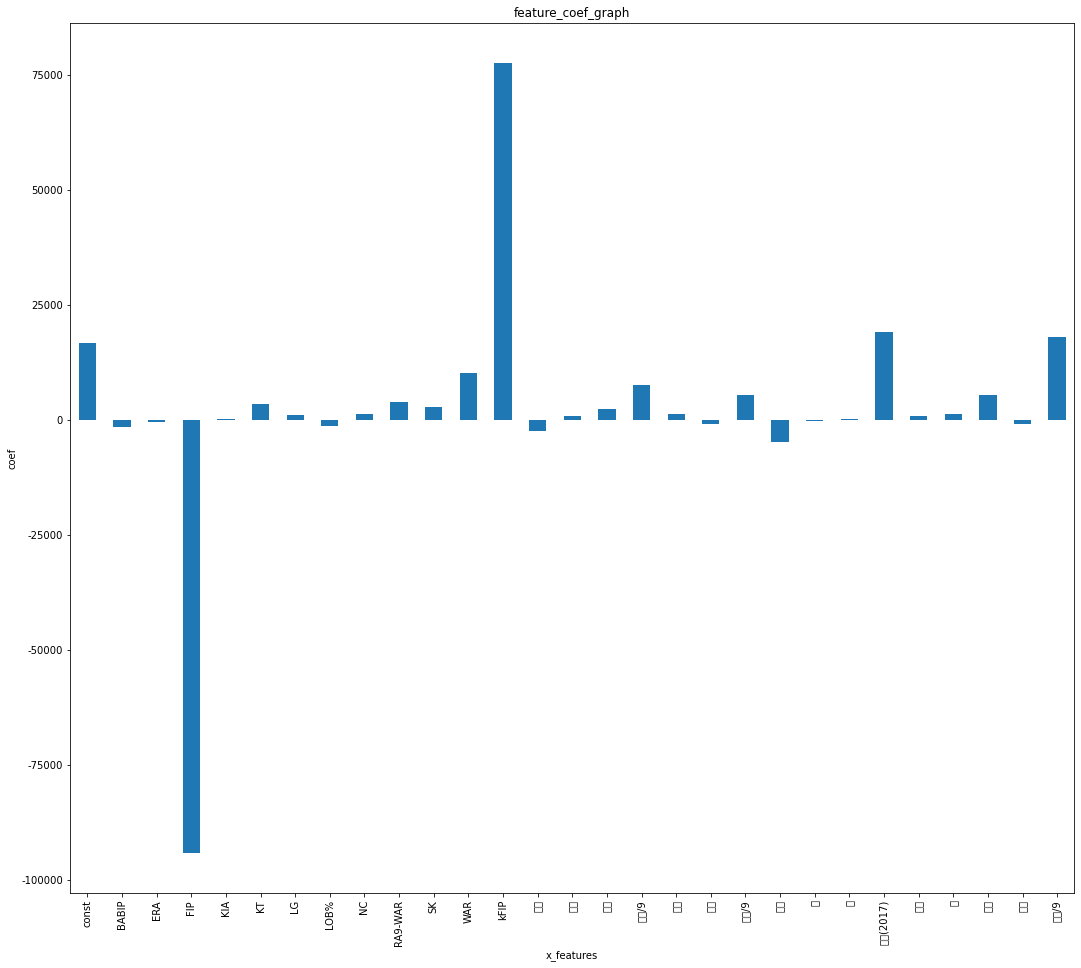

In [72]:
# 회귀 계수를 리스트로 반환한다.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환 한다.
x_labels = model.params.index.tolist()

# 회귀 계수를 출력

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

이에 대한 위 코드의 시각화 결과 FIP,WAR,홈런,작년 연봉 피처가 가장 영향력이 큰 것으로 보인다. 현재까지의 피처 탐색결과는 다음과 같이 정리할 수 있다.

다음으로 아래의 출력 결과는 수정 결정 계수 R2 score를 sklearn의 LinerRegression 클래스로 출력해 보자.

- 예측 모델의 평가하기 R2 score

In [74]:
# 학습 데이터와 테스트 데이터로 분리한다.

X= picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 회귀 분석 모델을 학습하자
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델을 평가한다.
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test)) # test R2 score를 출력

0.9276949405576705
0.8860171644977815


실행 결과의 각 값은 학습 데이터셋과 테스트 데이터셋에 대한 평가 점수를 의미하며, 이 두 점수는 최대한 벌어지지 않는 것이 좋다. 만약 학슴 점수가 테스트 점수에 비해 높다면 과대적합이 발생한 것이고, 모의고사에만 특화된 공부를 한 나머지, 실제 시험의 새로운 유형에 적응하지 못하는 경우라고 비유할 수 있다.

회귀 모델을 평가할 때는 RMSE score라는 측정 지표를 활용할 수 있다. 점수는 실제값과 예측값의 차이를 절대적인 수치로 나타낸 것이다. 이 값이 높으면 높을수록 예측이 부정확하다는 것을 의미한다. 다음 코드는 RMSE score를 출력한 것이다.

- RMSE score 예측 모델의 평가하기

In [75]:
# 회귀 분석 모델을 평가한다
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력

7282.7186847463745
14310.69643688915


이번에는 피처들의 상관관계를 살펴보기 위해 heatmap 방식의 시각화를 사용하자. 이를 통해 승-이닝, kFIP-FIP, RA9_WAR-WAR 등의 피처 쌍에서 높은 연관성을 발견할 수 있다.

- 피처들의 상관 관계 분석하기

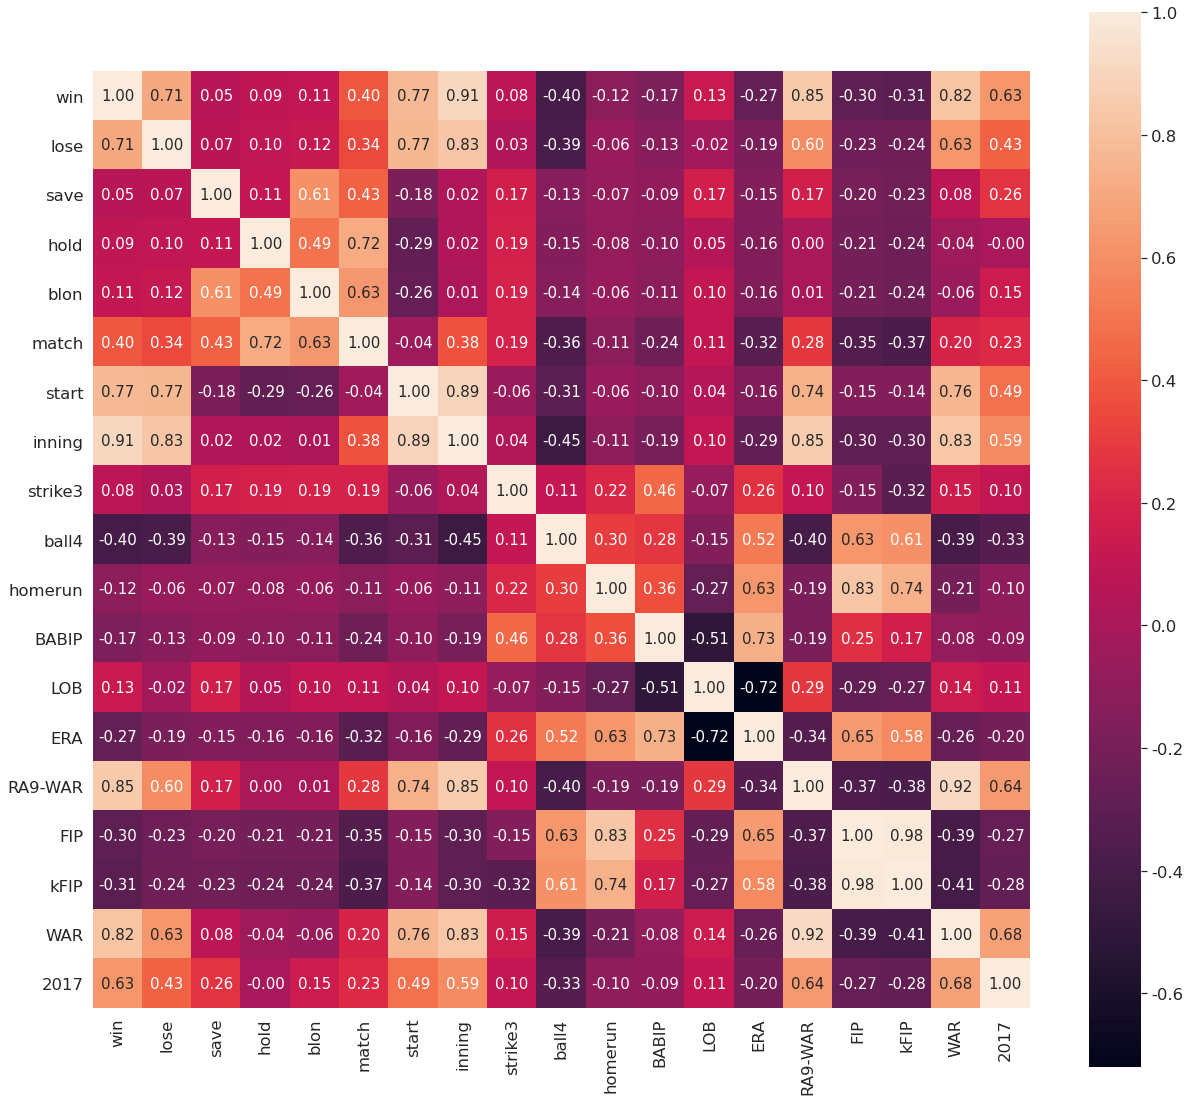

In [76]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산한다.
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화한다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

하지만 회귀 분석은 피처 간의 '독립성'을 전제로 하는 분석 방법이기 때문에 올바른 회귀 분석을 하려면 이러한 피처 쌍을 제거해야한다. 그래서 다중 공선성 이라는 것을 살펴봐야 한다. 두중 공선성이란 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것을 의미한다. 다중 공선성을 살펴봄으로써 여러 피처 간의 연관성을 고려했을 때 어떤 피처를 제거하는 것이 옳은 판단일지 혹은 제거하는 것 자체가 맞는 판단인지에 대한 기준을 제시해줄 수 있다. 다중 공선성은 분산팽창요인(VIF)Variance Inflation Factor 이라는 계수로 평가할 수 있다. 일반적으로 VIF 계수가 10~15 정도를 넘으면 그 피처는 다중 공선성의 문제가 발생했다고 판단할수 있다

#### Step4 시각화: 분석 결과 시각화하기

마지막 단계에서는 회귀 분석을 통해 얻어낸 예측연보과 2018년의 실제연봉 데이터를 비교하는 시각화 자료를 만들어보자. 다음의 코드는 회귀 분석 모델의 predict() 함수를 사용하여 2018년의 연봉을 예측하고, 이를 원래의 데이터 프레임에 '예측연봉'이라는 새로운 열로 합치는 과정이다. 전체 코드를 실행하면 [선수명, 실제연봉(2018), 예측연봉(2018), 작년연봉(2017)]을 columns로 하는 데이터 프레임을 출력할 수 있다. 단, 데이터 프레임을 생성할 때 한 가지 추가된 조건은 '재계약하여 연봉이 변화한 선수만을 대상으로 한다'는 조건이다. 재계약 하지 않은 선수는 연봉에 변화가 없으므로 예측의 의미가 없기 때문이다.

- 예측연봉과 실제연봉 비교하기

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


In [82]:
# 피처를 재선정합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [83]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [84]:
# 결과를 출력합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9150591192570362
0.9038759653889864


In [85]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7893.462873347694
13141.866063591087


In [86]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


In [87]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [88]:
# 원래의 데이터 프레임을 다시 로드
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합친다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


이에 대한 데이터 프레임의 시각화 결과는 아래와 같다. 그래프에서 볼 수 있듯이 학습한 회귀 모델은 연봉 상승의 전체적인 경향을 비교적 잘 맞춰내고 있다. 피처가 몇 개 되지 않는 간단한 회귀 분석이라는 것을 생각해보면 기대한 것보다는 정확한 예측 결과라고 할 수 있다.

<AxesSubplot:xlabel='선수명'>

/home/goldang/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/goldang/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/goldang/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/goldang/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/goldang/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/goldang/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_

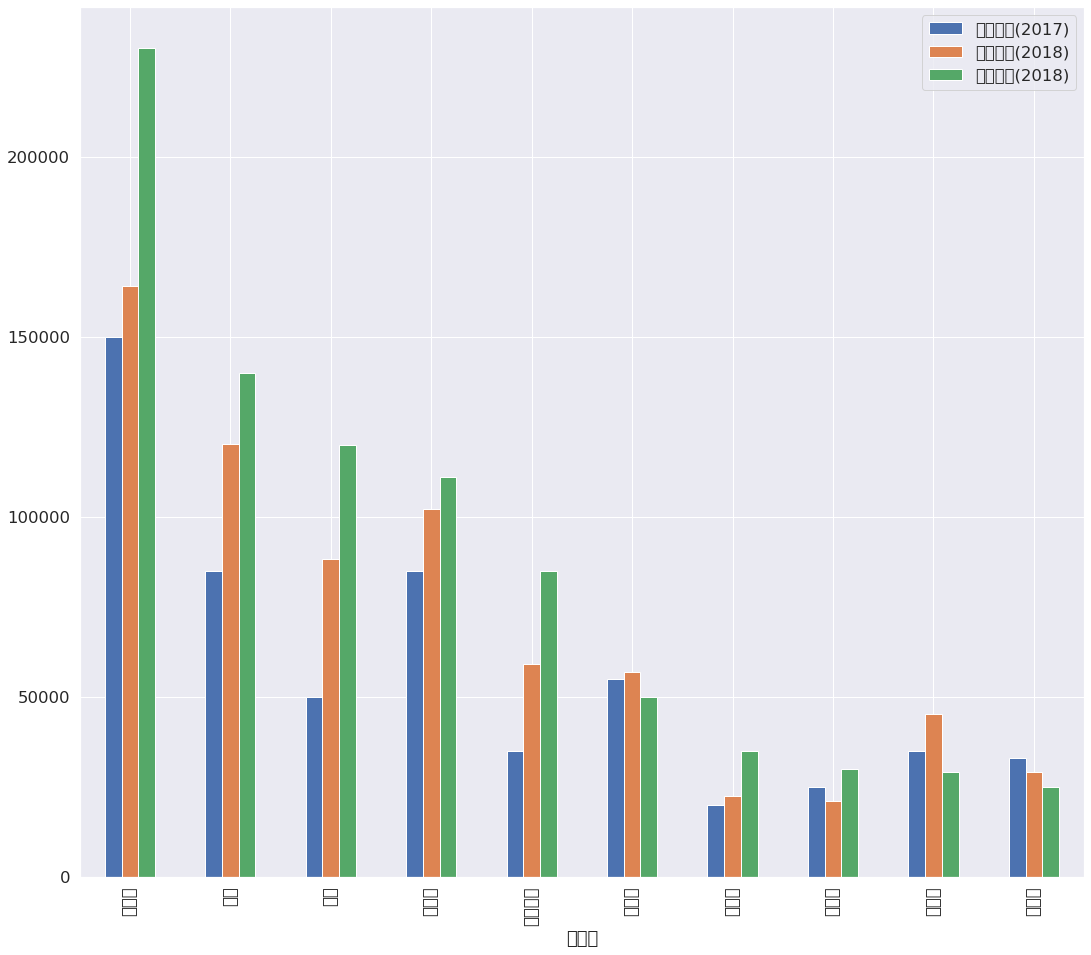

In [89]:
# 선수별 연봉 정보(작년연봉, 예측연봉, 실제연봉)를 막대 그래프로 출력한다.
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'],
              kind="bar")

지금까지 데이터 분석에서 가장 기초적인 예측 분석 방법인 회귀 분석을 알아보았다. 회귀 분석은 '머신러닝'을 비롯한 데이터 분석 기법 전반에 거려 아주 중요한 개념이기 때문에 중점적인 내용들을 반드시 이해하고 넘어가자